### Data Augmentation

Data augmentation is so important that Keras offers several methods to apply common augmentation techniques. To see how these methods work, let's create an ImageDataGenerator in Keras with the following augmentations: rotation, shift, horizontal flip (mirror image), and zoom.

In [1]:
from keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             zoom_range=0.2)

In order to use the data generator to create new images, we can use method $flow$, which takes data and generates batches of augmented data. To simplify the process of using the $flow$ method, we can create our own function where we can define how many images we want to generate:

In [2]:
import numpy as np

def GenerateImages(generator, image, num_images):
    new_images = []
    # we need to reshape the image because the generator.flow() 
    # expects an array of images
    image = np.reshape(image, (1,) + image.shape)
    print(image)
    for _ in range(num_images):
        batch = next(generator.flow(image, batch_size=1))
        new_images.append(batch[0])
    return np.array(new_images)

Now we can apply it to the BUas campus image you saw on Tuesday. In this example, we will be generating 9 augmented images:

In [3]:
import skimage as ski

# loads the image and converts it to a floating-point image, 
# where pixel values are represented in the range [0, 1].
image = ski.io.imread("BUas_1.png")
image = ski.util.img_as_float(image)

augmented_images = GenerateImages(data_gen, image, 9)

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.86666667 0.93333333 0.96470588]
   [0.8745098  0.92941176 0.96470588]
   [0.8745098  0.92941176 0.96470588]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.8745098  0.92941176 0.96470588]
   [0.87843137 0.92941176 0.96470588]
   [0.87843137 0.92941176 0.96470588]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.8745098  0.92941176 0.96470588]
   [0.87843137 0.92941176 0.96470588]
   [0.87843137 0.92941176 0.96470588]]

  ...

  [[0.67843137 0.47058824 0.45490196]
   [0.70980392 0.50196078 0.48627451]
   [0.68627451 0.49411765 0.4745098 ]
   ...
   [0.38039216 0.42352941 0.11764706]
   [0.4627451  0.50588235 0.2       ]
   [0.39607843 0.43921569 0.13333333]]

  [[0.69019608 0.48235294 0.46666667]
   [0.7

The generated images will be stored in the augmented_images array, which we can visualize using matplotlib:

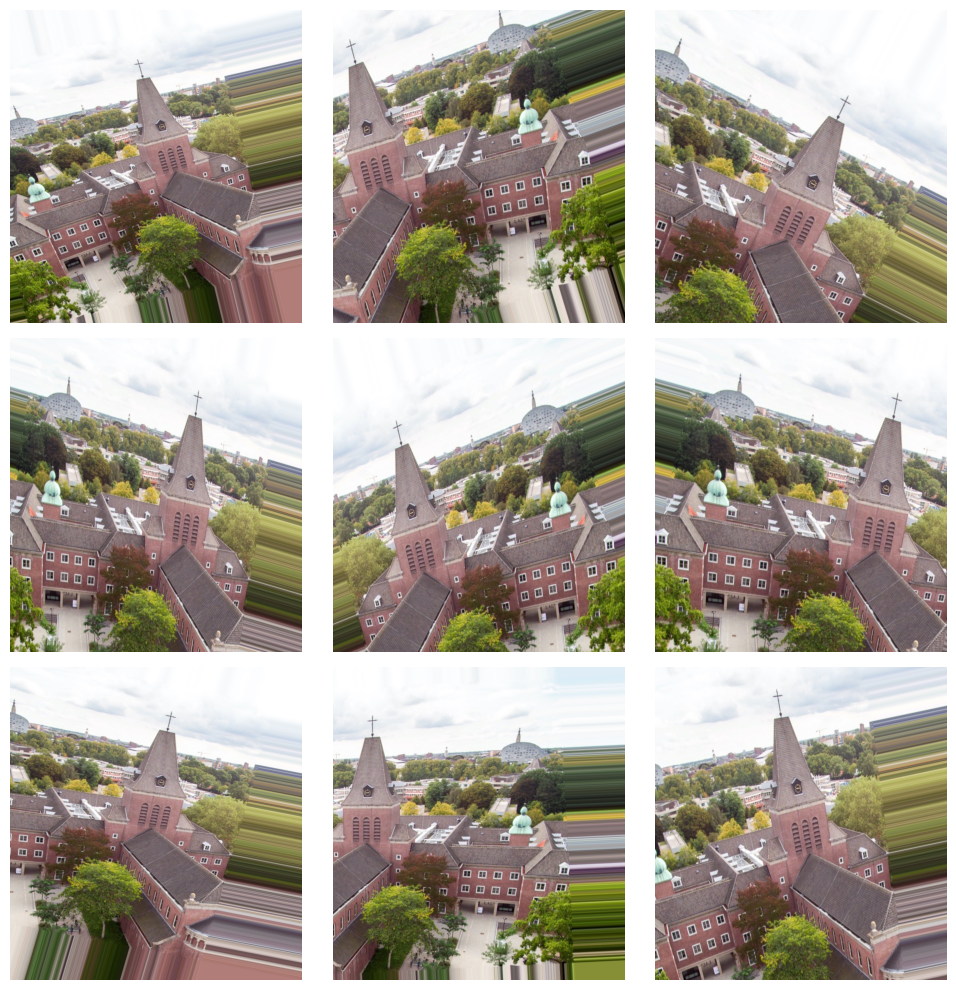

In [4]:
import matplotlib.pyplot as plt
import math

num_images = len(augmented_images)
grid_size = int(math.ceil(math.sqrt(num_images)))

fig, axes = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(10, 10))
axes = axes.flatten()

for i in range(grid_size * grid_size):
    if i < num_images:
        axes[i].imshow(augmented_images[i])
        axes[i].axis('off')
    else:
        axes[i].axis('off')   
        
plt.tight_layout()
plt.show()

As you can see in Figure 1, we created nine new images from a single image. Of course, these images are similar to the source image; therefore, the benefit cannot be as good as collecting data. But this method is still beneficial.

Notice that now you can easily save these images:

In [5]:
for i in range(num_images):
    # converts the image to a uint8 image (pixel  
    # values are represented in the range [0, 255]), 
    # and then saves the image.    
    image = ski.util.img_as_ubyte(augmented_images[i])
    ski.io.imsave("img_" + str(i) + ".png", image)

**Important**: please notice that the $ImageDataGenerator$ has been deprecated. Although you can still use its functionalities (and it's fine to use it in your creative brief project), it will be replaced in the future by Keras preprocessing layers for data augmentation. This is how a preprocessing layer to perform random flips and rotations look like:

In [6]:
import tensorflow as tf
import keras
from keras import layers

Here is an example of how to use Keras preprocessing layers for data augmentation:

In [ ]:
# creates the the preprocessing layer for data augmentation
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2)
])

# loads the image and converts it to a floating-point image
image = ski.io.imread("BUas_1.png")
image = ski.util.img_as_float(image)

# we need to reshape the image because the preprocessing layer 
# expects an array of images
image = np.reshape(image, (1,) + image.shape)

augmented_images = []
num_images = 9
for i in range(num_images):
    # generates an augmented image
    augmented = data_augmentation(image)
    augmented_images.append(augmented[0])

: 

### Applying Data Augmentation on my own dataset

In [7]:
import os
import numpy as np
import tensorflow
import skimage as ski
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Folder paths where the images of each class are stored
folder_paths = [
    r"/Users/daria/Desktop/dataset/alcoholic_beverages_bottle",
    r"/Users/daria/Desktop/dataset/non-alcoholic_beverages_bottle",
    r"/Users/daria/Desktop/dataset/non-alcoholic_beverages",
    r"/Users/daria/Desktop/dataset/lemon_lime",
    r"/Users/daria/Desktop/dataset/cocktail_fruits",
    r"/Users/daria/Desktop/dataset/coffee_grounds_package",

]

# Class labels for the images (same order as folder_paths)
class_names = [
    "alcoholic_beverages_bottle", 
    "non-alcoholic_beverages_bottle",
    "non-alcoholic_beverages",
    "lemon_lime",
    "cocktail_fruits",
    "coffee_grounds_package"
]

In [13]:
# Load the image and convert it into a floating-point image (range = [0, 1])
to_be_aug = ski.io.imread("multiple_bottles.jpg")
to_be_aug = ski.util.img_as_float(to_be_aug)

aug_img = GenerateImages(data_gen, to_be_aug, 16)

[[[[1.         1.         1.        ]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.95686275 0.95686275 0.95686275]
   [0.94901961 0.94901961 0.94901961]
   [0.94901961 0.94901961 0.94901961]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.96078431 0.96078431 0.96078431]
   [0.94117647 0.94117647 0.94117647]
   [0.94117647 0.94117647 0.94117647]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.95686275 0.95686275 0.95686275]
   [0.92156863 0.92156863 0.92156863]
   [0.92156863 0.92156863 0.92156863]]

  ...

  [[0.99607843 0.99607843 0.99607843]
   [1.         1.         1.        ]
   [0.99215686 0.99215686 0.99215686]
   ...
   [0.96470588 0.96470588 0.96470588]
   [0.9254902  0.9254902  0.9254902 ]
   [0.9254902  0.9254902  0.9254902 ]]

  [[0.92941176 0.92941176 0.92941176]
   [0.9

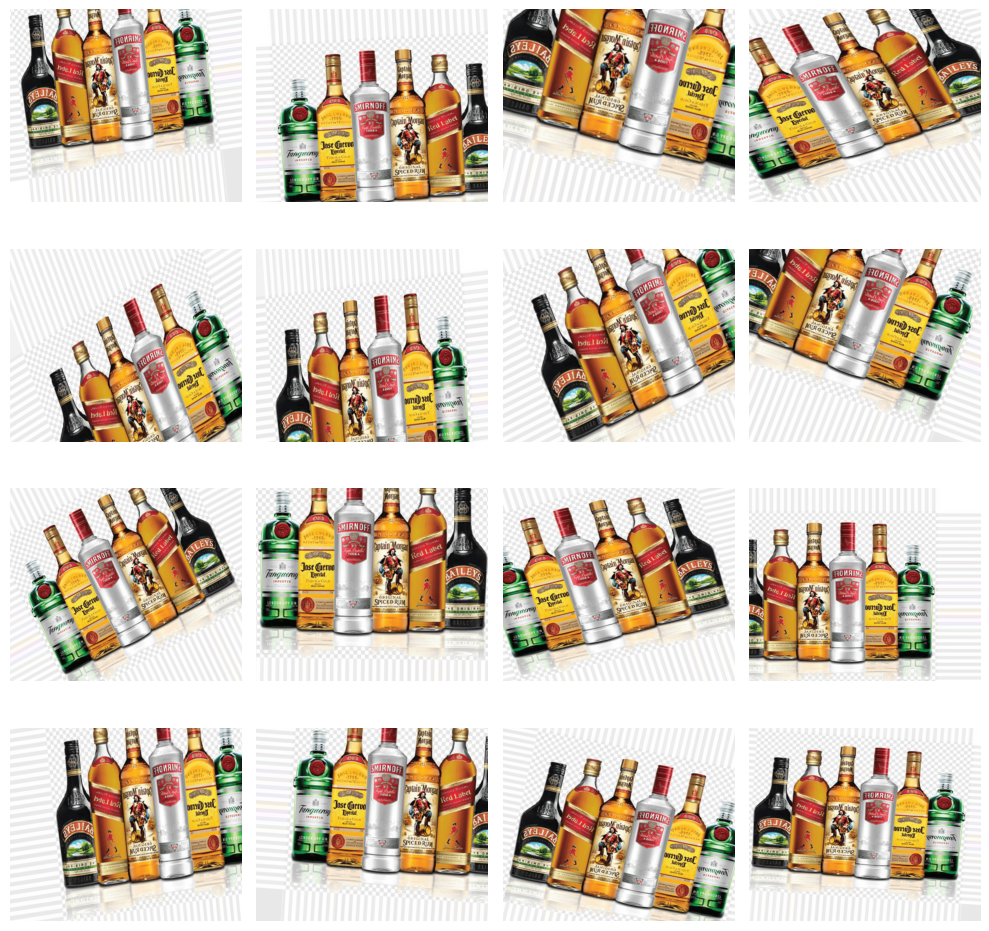

In [14]:
# Visualzie the images using matplotlib
num_images = len(aug_img)
grid_size = int(math.ceil(math.sqrt(num_images)))

fig, axes = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(10, 10))
axes = axes.flatten()

for i in range(grid_size * grid_size):
    if i < num_images:
        axes[i].imshow(aug_img[i])
        axes[i].axis('off')
    else:
        axes[i].axis('off')   
        
plt.tight_layout()
plt.show()

In [16]:
for i in range(num_images):
    # converts the image to a uint8 image (pixel  
    # values are represented in the range [0, 255]), 
    # and then saves the image.    
    image = ski.util.img_as_ubyte(aug_img[i])
    ski.io.imsave("img_" + str(i) + ".png", image)